# Decision trees and random forest
## Preprocessing

In [92]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#here i load the libraries and set the theme to seaborn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [93]:
#here i read the csv file and save it in a dataframe
df= pd.read_csv('January_Schiphol_Time_Groups.csv')
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [94]:
#here i make dummies from the different station names so i can use it for the random forest and decision trees algerithms
StationDummies=pd.get_dummies(df['Station_Name'])
StationDummies

,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,Apeldoorn Osseveld,...,Schiphol Airport,Sittard,Twello,Utrecht Centraal,Utrecht Overvecht,Veenendaal-De Klomp,Weert,Wierden,Wolfheze,Zaltbommel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76313,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#i also do this for the days of the week
DayDummies=pd.get_dummies(df['day_of_week'])
DayDummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
76310,0,0,0,1,0,0,0
76311,0,0,0,1,0,0,0
76312,0,0,0,1,0,0,0
76313,0,0,0,1,0,0,0


In [96]:
#for the time groups 
TimeDummies=pd.get_dummies(df['Time_Group'])
TimeDummies

,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
76310,0,0,0,0,1
76311,0,0,0,0,1
76312,0,0,0,0,1
76313,0,0,0,0,1


In [97]:
# an also for the train types
TrainDummies=pd.get_dummies(df['Train_Type'])
TrainDummies

,Extra trein,Intercity,Sprinter
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
76310,0,1,0
76311,0,1,0
76312,0,1,0
76313,0,1,0


In [98]:
#then i add all those dataframes with the dummies to the dataset
FinalDF=pd.concat([df, StationDummies, DayDummies, TimeDummies, TrainDummies], axis=1)
FinalDF

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,0,1,0,0,1,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,0,1,0,0,1,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,0,1,0,0,1,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,0,1,0,0,1,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,0,1,0,1,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,0,1,0,1,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,0,1,0,1,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,0,1,0,1,0


In [99]:
# and then last but not least i add the group if there is a train delay 
FinalDF['DelayOrNot'] = np.where(FinalDF['Train_Delay']==0, 0, 1).astype(int)
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [100]:
#then i import the function to split train and test data, select the y and x features and split the data into test and train data
from sklearn.model_selection import train_test_split

train_X = FinalDF.iloc[:, [11, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
train_y = FinalDF['DelayOrNot']

X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(train_X, train_y, test_size=0.2, random_state = 42)
train_X

,MaxNumberOfStops,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76311,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76312,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76313,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Decision trees part 1

In [101]:
# then i import tree, decisiontreeclassifier and gridsearch 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#and do a gridsearch to select the best values for the hyperparameters for the decision tree classifier
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [102]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 4


[Text(0.5, 0.9, 'X[8] <= 0.5\ngini = 0.439\nsamples = 76315\nvalue = [51431, 24884]'),
 Text(0.25, 0.7, 'X[14] <= 0.5\ngini = 0.398\nsamples = 62216\nvalue = [45163, 17053]'),
 Text(0.125, 0.5, 'X[6] <= 0.5\ngini = 0.384\nsamples = 57789\nvalue = [42788, 15001]'),
 Text(0.0625, 0.3, 'X[20] <= 0.5\ngini = 0.372\nsamples = 50950\nvalue = [38375, 12575]'),
 Text(0.03125, 0.1, 'gini = 0.378\nsamples = 49181\nvalue = [36720, 12461]'),
 Text(0.09375, 0.1, 'gini = 0.121\nsamples = 1769\nvalue = [1655, 114]'),
 Text(0.1875, 0.3, 'X[0] <= 5.5\ngini = 0.458\nsamples = 6839\nvalue = [4413, 2426]'),
 Text(0.15625, 0.1, 'gini = 0.496\nsamples = 1201\nvalue = [548, 653]'),
 Text(0.21875, 0.1, 'gini = 0.431\nsamples = 5638\nvalue = [3865, 1773]'),
 Text(0.375, 0.5, 'X[0] <= 8.0\ngini = 0.497\nsamples = 4427\nvalue = [2375, 2052]'),
 Text(0.3125, 0.3, 'X[47] <= 0.5\ngini = 0.486\nsamples = 2257\nvalue = [1318, 939]'),
 Text(0.28125, 0.1, 'gini = 0.48\nsamples = 1934\nvalue = [1162, 772]'),
 Text(0.343

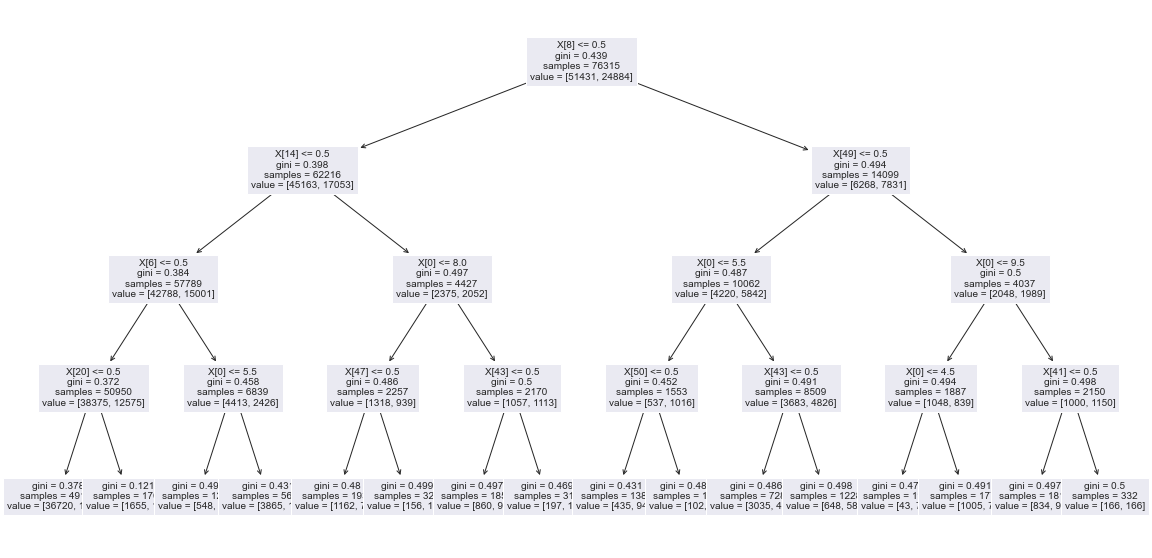

In [103]:
#here i make the desicion tree with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 42)
tree_clfFit = tree_clf.fit(train_X,train_y)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit, fontsize=10)

### Evaluation

In [104]:
#here i first check what the percentage is with no delay so i dont get the wrong idea drom the accurately score
total=FinalDF.DelayOrNot.count()
delay=FinalDF.DelayOrNot.sum()
percentNoDelay=1-delay/total
print('percentage with no delay is',percentNoDelay)

percentage with no delay is 0.6739304199698617


In [105]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#and give the accuracy score for this model
y_pred = tree_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred)

0.7009762169953482

the accuracy score is around 70%, but the overall percent of no delay is 67% procent so that basically means that there is a  change that the model is not that good with predicting delays, but good in predicting no delays

In [106]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.73      0.88      0.80     10364
     class 2       0.56      0.31      0.40      4899

    accuracy                           0.70     15263
   macro avg       0.65      0.60      0.60     15263
weighted avg       0.68      0.70      0.67     15263



To know if this true i look at the classification report and it is pretty much true. the delays have a pretty high change on being predicted as no delay.

In [107]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#and then firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf, train_X, train_y, cv=5))
cross_val_score(tree_clf, train_X, train_y, cv=5).mean()

[0.69331062 0.69049335 0.692852   0.70484177 0.69887964]


0.6960754766428618

the cross validation score is very close to the accuracy score, but becuase it still pretty low, if you consider the fact that if the model would only predict no delays the score would be 67%.

## Random forest

In [108]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,gini,12,30


In [109]:
#here i import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf = RandomForestClassifier(criterion='gini', max_depth=12, random_state = 42, n_estimators = 30)
forest_clf.fit(train_X,train_y)
forest_clf

RandomForestClassifier(max_depth=12, n_estimators=30, random_state=42)

### Evaluation

In [110]:
#here i give the accuracy score for this model
y_pred1 = forest_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred1)

0.7064142042848719

the accuracy score of this one is pretty much the same as the decision trees one, just a bit better. 

In [111]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.72      0.94      0.81     10364
     class 2       0.62      0.22      0.33      4899

    accuracy                           0.71     15263
   macro avg       0.67      0.58      0.57     15263
weighted avg       0.69      0.71      0.66     15263



If you look at the classification report it seems that for the no delays the precision score is pretty much the same but a bit lower and for the no delays it is a lot higher. but the recall for the daley is very low (a lot lower as the random forest one) so that would mean that a now delay often gets predicted as a no delay.

In [112]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf, train_X, train_y, cv=5))
cross_val_score(forest_clf, train_X, train_y, cv=5).mean()

[0.683745   0.67745528 0.6819105  0.69337614 0.68898644]


0.685094673393173

if you look at the cross validation score you see that its a bit lower then the one of the decision trees. A reason why the scores for both the models are not too good is becuase the data is bias, because there are far more no delays then delay (around 2/3 is no delay and 1/3 is delay). Too try to get better score i will make the groups around the sae size.

## Decision trees part 2

In [123]:
Delay=FinalDF[FinalDF['DelayOrNot']==1]
NoDelay=FinalDF[FinalDF['DelayOrNot']==0]
DelayCount=Delay.Station_Code.count()
NoDelayCount=NoDelay.Station_Code.count()
NoDelay_Under=NoDelay.sample(DelayCount, random_state=42)
FinalDF_under=pd.concat([NoDelay_Under, Delay]).reset_index()
train_X2 = FinalDF_under.iloc[:, [12, 17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]]
train_y2 = FinalDF_under['DelayOrNot']
X_train_train2, X_test_train2, y_train_train2, y_test_train2 = train_test_split(train_X2, train_y2, test_size=0.2, random_state = 42)

In [124]:
FinalDF_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49768 entries, 0 to 49767
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         49768 non-null  int64  
 1   Unnamed: 0                    49768 non-null  int64  
 2   Station_Code                  49768 non-null  object 
 3   Station_Name                  49768 non-null  object 
 4   Train_Number                  49768 non-null  int64  
 5   Train_Type                    49768 non-null  object 
 6   Train_Company                 49768 non-null  object 
 7   Train_Destination_Planned     49768 non-null  object 
 8   Train_Destination_Actual      49768 non-null  object 
 9   Train_Departure_Planned       49768 non-null  object 
 10  Train_Departure_Actual        49768 non-null  object 
 11  Train_Delay                   49768 non-null  float64
 12  MaxNumberOfStops              49768 non-null  int64  
 13  w

In [125]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(train_X2, train_y2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [126]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 2


[Text(0.5, 0.8333333333333334, 'X[8] <= 0.5\ngini = 0.5\nsamples = 49768\nvalue = [24884, 24884]'),
 Text(0.25, 0.5, 'X[14] <= 0.5\ngini = 0.492\nsamples = 38942\nvalue = [21889, 17053]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.487\nsamples = 35735\nvalue = [20734, 15001]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.461\nsamples = 3207\nvalue = [1155, 2052]'),
 Text(0.75, 0.5, 'X[49] <= 0.5\ngini = 0.4\nsamples = 10826\nvalue = [2995, 7831]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.384\nsamples = 7888\nvalue = [2046, 5842]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.437\nsamples = 2938\nvalue = [949, 1989]')]

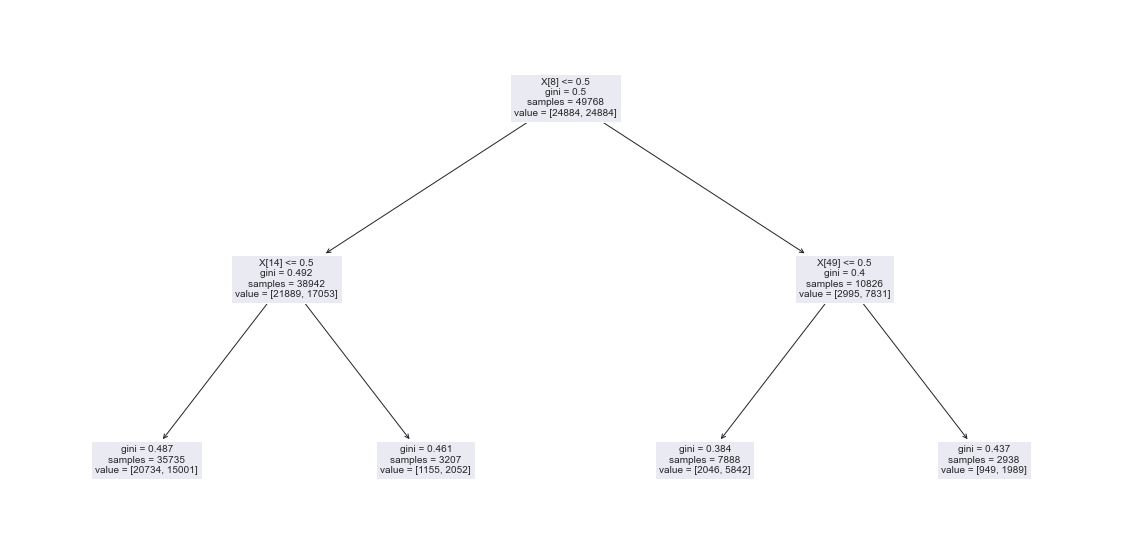

In [131]:
#here i make the desicion tree with the best parameters
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42)
tree_clfFit2 = tree_clf2.fit(train_X2,train_y2)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit2, fontsize=10)

### Evaluation

In [132]:
#here i give the accuracy score for this model
y_pred2 = tree_clf2.predict(X_test_train2)
accuracy_score(y_test_train2, y_pred2)

0.6228651798272051

Now the accuracy score is 62% which is lower then the first 2 models, but because the 2 groups now both have the same amount of rows it is better I think, but the classification report has to indicate the same thing

In [133]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.59      0.84      0.69      4988
     class 2       0.71      0.41      0.52      4966

    accuracy                           0.62      9954
   macro avg       0.65      0.62      0.60      9954
weighted avg       0.65      0.62      0.60      9954



for class 1 the precision is not very high but the recall is high, which means there is bigger chance the other group get predicted for this class and that there is a lower chance that its predicted as something else and for class 2 its the other way around.

In [130]:
#here i firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf2, train_X2, train_y2, cv=5))
cross_val_score(tree_clf2, train_X2, train_y2, cv=5).mean()

[0.61965039 0.58107294 0.61080972 0.61941123 0.61348337]


0.6088855313362396

here i can see that the scores here are a bit lower, but still pretty close to the accuracy score.

## Conclusion
because the inbalanced dataset the best model is the last one. the decision tree model is does not have super high scores tho, so for the next iteration i would like to try out different ways of sampling and/or the random forest model as well.